In [1]:
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
from IPython.display import display, HTML

In [2]:
df = pd.read_csv('scraped.csv', encoding="utf-8")

In [3]:
conditions = [
    (df['valence'] >= 0.80) & (df['energy'] <= 0.63),
    (df['valence'] <= 0.49) & (df['energy'] <= 0.63),
    (df['valence'] >0.49) & (df['valence'] < 0.80) & (df['energy'] > 0.63 ) & (df['energy'] < 0.83 ),
    (df['valence'] >= 0.80) & (df['energy'] >= 0.83),
    (df['valence'] <= 0.49) & (df['energy'] >= 0.83),
    (df['valence'] >0.49) & (df['valence'] < 0.80) & (df['energy'] <= 0.63 ),
    (df['valence'] >=0.80) & (df['energy'] > 0.63 ) & (df['energy'] < 0.83 ),
    (df['valence'] <= 0.49) & (df['energy'] > 0.63 ) & (df['energy'] < 0.83 ),
    (df['valence'] >0.49) & (df['valence'] < 0.80) & (df['energy'] >= 0.83 ),
    ]

In [4]:
choices = ['peaceful', 'somber', 'sensual', 'excited', 'aggressive', 'sentimental', 'upbeat', 'serious', 'energizing']

In [5]:
df['label'] = np.select(conditions, choices, default='none')

Text(0, 0.5, 'Valence')

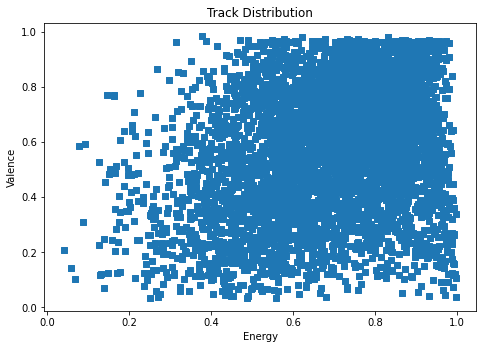

In [6]:
%matplotlib inline
fig=plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(df["energy"], df["valence"], marker=",")
ax.set_title("Track Distribution")
ax.set_xlabel("Energy")
ax.set_ylabel("Valence")

In [7]:
cols = ['label']  + [col for col in df if col != 'label']

In [8]:
df = df[cols]

In [9]:
df.to_csv('labelled_scraped.csv', line_terminator="\n", encoding="utf-8", quoting=csv.QUOTE_NONNUMERIC)